# 참고

[프로그래머를 위한 베이지안 with 파이썬](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

# 프로그래머를 위한 베이지안 with 파이썬

## 목차

### 라이브러리

In [1]:
# import os
# import io
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import scipy.stats as stats

### 동전 던지기 예시

In [ ]:
# 사전분포
베타연속확률변수 = stats.beta
# 보고싶은 앞면이 나올 확률들
_0부터1까지일정한간격의100개의숫자 = np.linspace(0, 1, 100)

동전을던진횟수들 = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

# 동전 던지기 결과
동전던지기확률 = 0.5
베르누이이산확률변수 =  stats.bernoulli.rvs(동전던지기확률, size=동전을던진횟수들[-1])

# 사후분포, 동전 던지기 결과로 업데이트한 분포 
동전을던진횟수 = 7
앞면이나온횟수 = 베르누이이산확률변수[:동전을던진횟수들[동전을던진횟수]].sum()
뒷면이나온횟수 = 동전을던진횟수들[동전을던진횟수] - 앞면이나온횟수

# 베타 분포의 확률 밀도 함수에 앞면이 나올 확률들을 대입하여 얻은 확률밀도 값들
확률밀도함수 = 베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수)

array([0.00000000e+00, 1.01847230e-09, 1.20094871e-07, 1.88868383e-06,
       1.30121601e-05, 5.70103194e-05, 1.87526633e-04, 5.05975530e-04,
       1.18059697e-03, 2.46478054e-03, 4.71260097e-03, 8.38978416e-03,
       1.40787260e-02, 2.24766556e-02, 3.43865235e-02, 5.07006721e-02,
       7.23777757e-02, 1.00413911e-01, 1.35808922e-01, 1.79529457e-01,
       2.32470214e-01, 2.95414970e-01, 3.68998994e-01, 4.53674329e-01,
       5.49679340e-01, 6.57013712e-01, 7.75419881e-01, 9.04371641e-01,
       1.04307041e+00, 1.19044934e+00, 1.34518533e+00, 1.50571846e+00,
       1.67027848e+00, 1.83691761e+00, 2.00354863e+00, 2.16798722e+00,
       2.32799753e+00, 2.48133956e+00, 2.62581709e+00, 2.75932507e+00,
       2.87989496e+00, 2.98573707e+00, 3.07527879e+00, 3.14719766e+00,
       3.20044867e+00, 3.23428502e+00, 3.24827204e+00, 3.24229383e+00,
       3.21655280e+00, 3.17156203e+00, 3.10813079e+00, 3.02734382e+00,
       2.93053481e+00, 2.81925498e+00, 2.69523752e+00, 2.56035894e+00,
      

### note 

켤레 사전 분포
    사전 분포와 사후 분포가 같은 분포족에 속하는 경우
    장점: 계산의 편리성, 직관적인 해석, 베이지안 업데이트가 간단함
    단점: 모든 경우에 적용 가능한 것은 아니다. 사전 정보를 정확하게 반영하기 어려울 수 있다.

켤러 사전 분포가 아닌 분포
    정규 분포의 정규-정규 사전 분포, 포아송 분포의 감마 사전 분포, 다양한 비모수적 사전 분포
    단점: 계산의 복잡성, MCMC 방법과 같은 수치적 방법을 사용하여 사후 분포를 근사, 모델 선택의 어려움, 해석의 어려움

In [6]:
베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1, 2)

array([2.        , 1.97979798, 1.95959596, 1.93939394, 1.91919192,
       1.8989899 , 1.87878788, 1.85858586, 1.83838384, 1.81818182,
       1.7979798 , 1.77777778, 1.75757576, 1.73737374, 1.71717172,
       1.6969697 , 1.67676768, 1.65656566, 1.63636364, 1.61616162,
       1.5959596 , 1.57575758, 1.55555556, 1.53535354, 1.51515152,
       1.49494949, 1.47474747, 1.45454545, 1.43434343, 1.41414141,
       1.39393939, 1.37373737, 1.35353535, 1.33333333, 1.31313131,
       1.29292929, 1.27272727, 1.25252525, 1.23232323, 1.21212121,
       1.19191919, 1.17171717, 1.15151515, 1.13131313, 1.11111111,
       1.09090909, 1.07070707, 1.05050505, 1.03030303, 1.01010101,
       0.98989899, 0.96969697, 0.94949495, 0.92929293, 0.90909091,
       0.88888889, 0.86868687, 0.84848485, 0.82828283, 0.80808081,
       0.78787879, 0.76767677, 0.74747475, 0.72727273, 0.70707071,
       0.68686869, 0.66666667, 0.64646465, 0.62626263, 0.60606061,
       0.58585859, 0.56565657, 0.54545455, 0.52525253, 0.50505

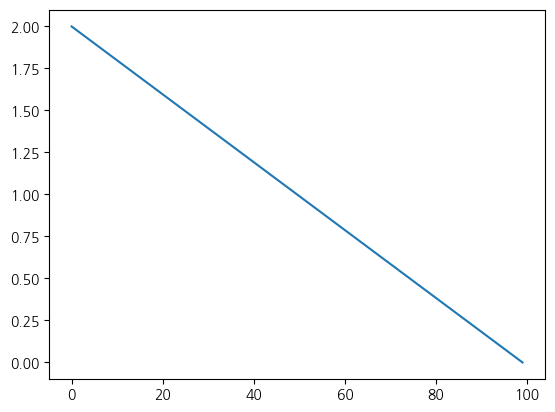

In [7]:
plt.plot(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1, 2))

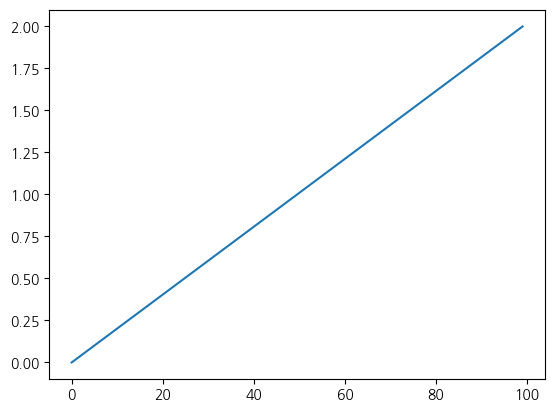

In [8]:
plt.plot(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 2, 1))

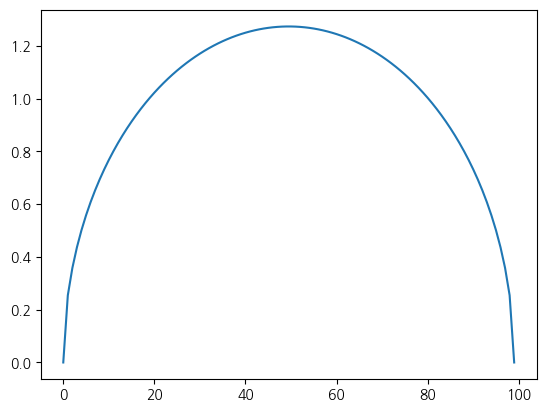

In [9]:
plt.plot(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1.5, 1.5))

In [4]:
베타연속확률변수.pdf(0.7, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수)

np.float64(0.556320228544081)

In [ ]:
동전을던진횟수 = 7

앞면이나온횟수 = 베르누이이산확률변수[:동전을던진횟수들[동전을던진횟수]].sum()

뒷면이나온횟수 = 동전을던진횟수들[동전을던진횟수] - 앞면이나온횟수
베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수)

array([0.00000000e+00, 8.24807497e-14, 3.97096914e-11, 1.43454718e-09,
       1.79422829e-08, 1.25456540e-07, 6.07092811e-07, 2.27827146e-06,
       7.09666627e-06, 1.91705153e-05, 4.62739087e-05, 1.01959183e-04,
       2.08325712e-04, 3.99463427e-04, 7.25541103e-04, 1.25745715e-03,
       2.09191745e-03, 3.35675429e-03, 5.21625489e-03, 7.87623156e-03,
       1.15885381e-02, 1.66547230e-02, 2.34285076e-02, 3.23167905e-02,
       4.37789057e-02, 5.83238980e-02, 7.65056374e-02, 9.89156483e-02,
       1.26173607e-01, 1.58915540e-01, 1.97779822e-01, 2.43391197e-01,
       2.96343064e-01, 3.57178425e-01, 4.26369901e-01, 5.04299327e-01,
       5.91237469e-01, 6.87324459e-01, 7.92551560e-01, 9.06744878e-01,
       1.02955165e+00, 1.16042965e+00, 1.29864035e+00, 1.44324615e+00,
       1.59311223e+00, 1.74691321e+00, 1.90314487e+00, 2.06014092e+00,
       2.21609482e+00, 2.36908636e+00, 2.51711272e+00, 2.65812350e+00,
       2.79005899e+00, 2.91089113e+00, 3.01866602e+00, 3.11154732e+00,
      

In [8]:
sum(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수))

np.float64(98.99999999996777)

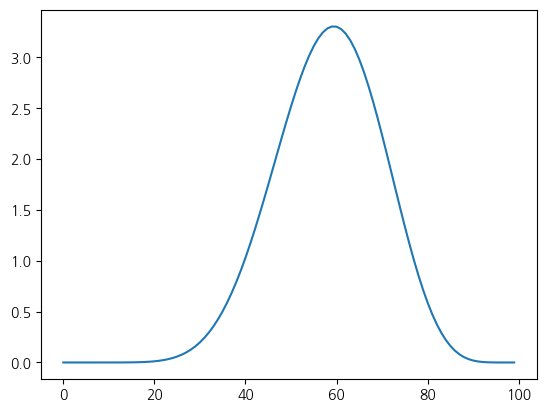

In [6]:
plt.plot(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수))

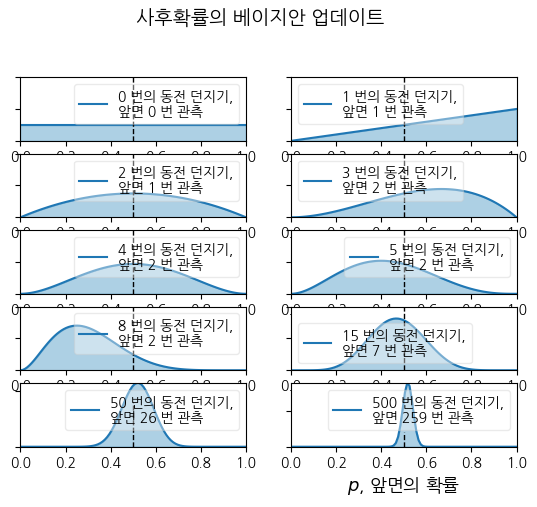

<Figure size 4000x2000 with 0 Axes>

In [8]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials) / 2), 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)
plt.figure(figsize=(40, 20))
plt.tight_layout()